<a href="https://githubtocolab.com/alsinmr/WindeschleubaNMRSchool/blob/main/JupyterExercises/Sol5/ex05_T1_3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral Density Functions: T$_1$ Relaxation
### Solution to 1.3

### 1) Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 16})
from numpy import pi

### 2) Define Constants

In [5]:
mu0 = 4*pi*1e-7                   #V s / A / m
hbar = 1.05457266e-34             #J s / rad
h = 2*pi*hbar                     #J s
gammaH = 26.7522128e7             #rad / s / T
gammaN = -2.7116e7                #rad / s / T
rNH = 1.1*1e-10                   #m 

### 3) Functions

In [6]:
#Spectral density function (for isotropic tumbling)
    #Call as: Jiso(omega, tau)
    #one of the two inputs can be an array
Jiso = lambda omega, tau: (2/5)*tau/(1+(omega*tau)**2)

### 4) Parameters

In [7]:
B0 = np.arange(1,30,.1)            #T
sigma_zz = 0                       #ppm
tauC1 = 10**-12;                   #s
tauC2 = 10**-10;                   #s
tauC3 = 10**-8;                    #s

omegaI = -B0*gammaH                 #rad/s, 1H Larmor frequency
omegaS = -B0*gammaN                 #rad/s, 15N Larmor frequency

deltaIS = -2*mu0*gammaH*gammaN*hbar/(4*pi)/rNH**3

### 5) Calculate T$_{1S}$

In [9]:
#s. Eq. (3) on the exercise sheet
    #note that sigma_zz is given in ppm above
R1S_tauC1 = (deltaIS/4)**2 * (Jiso(omegaI-omegaS, tauC1) + 3*Jiso(omegaS, tauC1) \
                             + 6*Jiso(omegaI+omegaS, tauC1)) \
                             + 3/4 * (omegaS*sigma_zz*1e-6)**2 * Jiso(omegaS, tauC1)
R1S_tauC2 = (deltaIS/4)**2 * (Jiso(omegaI-omegaS, tauC2) + 3*Jiso(omegaS, tauC2) \
                              + 6*Jiso(omegaI+omegaS, tauC2)) \
                              + 3/4 * (omegaS*sigma_zz*1e-6)**2 * Jiso(omegaS, tauC2)
R1S_tauC3 = (deltaIS/4)**2 * (Jiso(omegaI-omegaS, tauC3) + 3*Jiso(omegaS, tauC3) \
                              + 6*Jiso(omegaI+omegaS, tauC3)) \
                              + 3/4 * (omegaS*sigma_zz*1e-6)**2 * Jiso(omegaS, tauC3)

T1S_tauC1 = 1/R1S_tauC1
T1S_tauC2 = 1/R1S_tauC2
T1S_tauC3 = 1/R1S_tauC3

### 5) Semi-Logarithmic Plot of $T_{1S}$ vs $B_0$

(0.01, 1000)

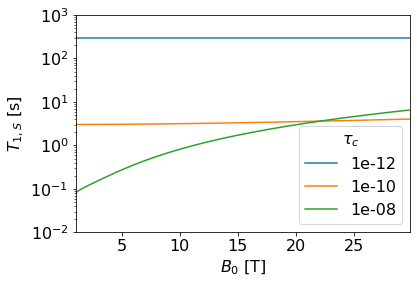

In [15]:
fig,ax=plt.subplots()
fig.set_size_inches([8,6])
ax.semilogy(B0, T1S_tauC1, linewidth=1.5)
ax.semilogy(B0, T1S_tauC2, linewidth=1.5)
ax.semilogy(B0, T1S_tauC3, linewidth=1.5)
ax.set_xlabel(r"$B_0$ [T]")
ax.set_ylabel(r"$T_{1, S}$ [s]")
ax.legend([f'{tauC1:.0e}',f'{tauC2:.0e}', f'{tauC3:.0e}'],title=r'$\tau_c$',loc='lower right')
ax.set_xlim([B0[0],B0[-1]])
ax.set_ylim([10**-2,10**3])